In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Pre_data = pd.read_csv("C:\\Users\\2019A00303\\Desktop\\Code\\Airbnb Project\\Data\\PreProcessingCanada.csv")
Pre_data

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month
0,3553,2015-08-05,Canada,45.521633,-73.616062,2.0,1.0,1.0,1.0,30.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,8
1,3554,2013-03-25,Canada,45.518822,-73.609443,6.0,1.0,4.0,4.0,105.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,3
2,3555,2015-06-19,Canada,45.521151,-73.608683,2.0,1.0,2.0,2.0,105.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,6
3,3556,2015-01-23,Canada,45.523493,-73.610075,2.0,1.0,1.0,1.0,40.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4,1
4,3558,2012-01-24,Canada,45.518052,-73.611055,4.0,1.0,2.0,2.0,119.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22857,485610,2013-09-07,Canada,46.836635,-71.221494,2.0,1.0,1.0,1.0,70.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5,9
22858,485611,2013-04-01,Canada,46.743645,-71.358465,5.0,1.5,3.0,4.0,186.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,4
22859,485612,2015-07-11,Canada,46.799719,-71.243788,2.0,1.0,1.0,1.0,40.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5,7
22860,485614,2015-04-27,Canada,46.795355,-71.259095,4.0,1.0,2.0,3.0,135.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,4


<AxesSubplot:ylabel='Frequency'>

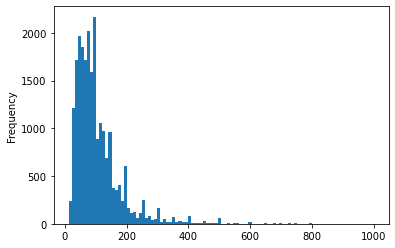

In [33]:
Pre_data['Price'].plot(kind='hist', bins=100)

In [2]:
Pre_data['group'] = pd.cut(x=Pre_data['Price'],
bins=[0, 50, 100, 150, 200, 1000],
labels=['group_1','group_2','group_3','group_4','group_5'])
Pre_data.head()

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month,group
0,3553,2015-08-05,Canada,45.521633,-73.616062,2.0,1.0,1.0,1.0,30.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,8,group_1
1,3554,2013-03-25,Canada,45.518822,-73.609443,6.0,1.0,4.0,4.0,105.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,3,group_3
2,3555,2015-06-19,Canada,45.521151,-73.608683,2.0,1.0,2.0,2.0,105.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,6,group_3
3,3556,2015-01-23,Canada,45.523493,-73.610075,2.0,1.0,1.0,1.0,40.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4,1,group_1
4,3558,2012-01-24,Canada,45.518052,-73.611055,4.0,1.0,2.0,2.0,119.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,group_3


In [3]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(Pre_data, Pre_data["group"]):
    train = Pre_data.loc[train_index]
    test = Pre_data.loc[test_index]

In [4]:
train['group'].value_counts() / len(train)

group_2    0.404669
group_1    0.217672
group_3    0.209798
group_4    0.086883
group_5    0.080978
Name: group, dtype: float64

In [5]:
test['group'].value_counts() / len(test)

group_2    0.404548
group_1    0.217581
group_3    0.209928
group_4    0.087033
group_5    0.080910
Name: group, dtype: float64

In [6]:
train.drop('group', axis=1, inplace=True)
train.head()

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month
8051,171114,2013-12-06,Canada,43.642581,-79.382120,4.0,1.0,1.0,1.0,139.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,12
7408,166606,2016-05-01,Canada,43.653477,-79.433188,2.0,1.0,1.0,1.0,51.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6,5
12,3569,2013-04-27,Canada,45.499912,-73.578685,6.0,2.0,2.0,2.0,224.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,4
709,13895,2016-03-11,Canada,43.653818,-79.366593,2.0,1.0,1.0,1.0,76.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4,3
22397,482190,2016-03-21,Canada,43.642230,-79.381285,2.0,1.0,0.0,1.0,99.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,3


In [7]:
test.drop(['Unnamed: 0','group', 'Host Since', 'Country', 'Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed', 'Cleaning Fee'], axis=1, inplace=True)
test.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
7360,43.671297,-79.321439,6.0,1.5,3.0,5.0,150.0,1.0,0.0,5.0,10.0,2.0,1.0,0.0,0.0,1,9
19379,45.493507,-73.556813,3.0,1.0,1.0,1.0,129.0,2.0,39.0,1.0,1125.0,43.0,1.0,0.0,0.0,1,4
20936,49.251147,-123.075980,5.0,1.0,2.0,3.0,150.0,1.0,0.0,2.0,1125.0,36.0,1.0,0.0,0.0,2,1
18890,49.268852,-123.154420,2.0,1.0,1.0,1.0,214.0,1.0,0.0,1.0,1125.0,2.0,1.0,0.0,0.0,1,9
9900,49.278798,-123.137267,4.0,1.0,1.0,2.0,75.0,1.0,10.0,2.0,1125.0,53.0,1.0,0.0,0.0,4,6


In [8]:
train_y = train[['Price']]
train_y.head()

,Price
8051,139.0
7408,51.0
12,224.0
709,76.0
22397,99.0


In [9]:
train.drop(['Unnamed: 0', 'Price', 'Host Since', 'Country','Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed', 'Cleaning Fee'], axis=1, inplace=True)
train_X = train
train_X.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
8051,43.642581,-79.382120,4.0,1.0,1.0,1.0,2.0,29.0,1.0,1125.0,28.0,1.0,0.0,0.0,4,12
7408,43.653477,-79.433188,2.0,1.0,1.0,1.0,1.0,10.0,5.0,60.0,9.0,0.0,1.0,0.0,6,5
12,45.499912,-73.578685,6.0,2.0,2.0,2.0,4.0,10.0,3.0,1125.0,5.0,1.0,0.0,0.0,5,4
709,43.653818,-79.366593,2.0,1.0,1.0,1.0,1.0,25.0,1.0,5.0,9.0,0.0,1.0,0.0,4,3
22397,43.642230,-79.381285,2.0,1.0,0.0,1.0,1.0,0.0,1.0,1125.0,59.0,1.0,0.0,0.0,0,3


In [10]:
test_y= test[['Price']]
test_y.head()

,Price
7360,150.0
19379,129.0
20936,150.0
18890,214.0
9900,75.0


In [11]:
test.drop('Price', axis=1, inplace=True)
test_X = test
test_X.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
7360,43.671297,-79.321439,6.0,1.5,3.0,5.0,1.0,0.0,5.0,10.0,2.0,1.0,0.0,0.0,1,9
19379,45.493507,-73.556813,3.0,1.0,1.0,1.0,2.0,39.0,1.0,1125.0,43.0,1.0,0.0,0.0,1,4
20936,49.251147,-123.075980,5.0,1.0,2.0,3.0,1.0,0.0,2.0,1125.0,36.0,1.0,0.0,0.0,2,1
18890,49.268852,-123.154420,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1125.0,2.0,1.0,0.0,0.0,1,9
9900,49.278798,-123.137267,4.0,1.0,1.0,2.0,1.0,10.0,2.0,1125.0,53.0,1.0,0.0,0.0,4,6


In [12]:
# from sklearn.linear_model import LinearRegression

# l_reg = LinearRegression()
# l_reg.fit(train_X, train_y)

In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

# predictions = l_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [14]:
# predictions = l_reg.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [15]:
# from sklearn.tree import DecisionTreeRegressor

# d_reg = DecisionTreeRegressor()
# d_reg.fit(train_X, train_y)

In [16]:
# predictions = d_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [17]:
# predictions = d_reg.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [18]:
# from sklearn.svm import SVR

# svr = SVR()
# svr.fit(train_X, train_y)

In [19]:
# predictions = svr.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [20]:
# predictions = svr.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [21]:
# from sklearn.neighbors import KNeighborsRegressor
# knn = KNeighborsRegressor()
# knn.fit(train_X, train_y)

In [22]:
# predictions = knn.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [23]:
# predictions = knn.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [24]:
# from sklearn.neural_network import MLPRegressor

# ann = MLPRegressor()
# ann.fit(train_X, train_y)

In [25]:
# predictions = ann.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [26]:
# predictions = ann.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [27]:
from sklearn.ensemble import RandomForestRegressor

r_reg = RandomForestRegressor()
r_reg.fit(train_X, train_y)

C:\Users\2019A0~1\AppData\Local\Temp/ipykernel_22040/806139679.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r_reg.fit(train_X, train_y)


RandomForestRegressor()

Text(0.5, 0, 'Relative Importance')

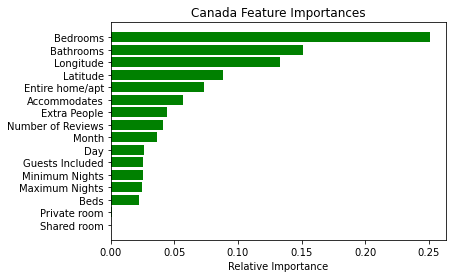

In [28]:
features = train_X.columns
importances = r_reg.feature_importances_
indices = np.argsort(importances)

plt.title('Canada Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

In [29]:
predictions = r_reg.predict(train_X)
mse = mean_squared_error(train_y, predictions)
mae = mean_absolute_error(train_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

389.6175343321122 19.738731831911394 11.46084203619662


In [30]:
# from sklearn.model_selection import GridSearchCV

# param = {'n_estimators' : [800,900,1000], 'max_features' : ['sqrt','auto','log2'], 'max_depth' : [8,9,10],
#          'min_samples_split': [2,3,4]}

# r_reg = RandomForestRegressor(random_state=42)

# search = GridSearchCV(r_reg, param, cv=5,
#                       scoring='neg_mean_absolute_error')
                      
# search.fit(train_X, train_y['Price'].ravel())

In [31]:
# from sklearn.ensemble import RandomForestRegressor

# r_reg = RandomForestRegressor(bootstrap=True,
#                               min_samples_split=2,
#                               criterion='mse',
#                               max_depth=None,
#                               max_features='auto',
#                               n_estimators=1000,
#                               random_state=42,
#                               )
# r_reg.fit(train_X, train_y['Price'].ravel())

In [32]:
# predictions = r_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)